 **Dataset Description:

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Description of each column in the dataset:

show_id: A unique identifier for each show or movie.

type: The type of content, either "Movie" or "TV Show."

title: The title of the movie or TV show.

director: The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

cast: The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

country: The country where the movie or TV show was produced or is associated with.

date_added: The date when the content was added to the streaming platform, in the format "Month Day, Year."

release_year: The year the movie or TV show was originally released.

rating: The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

duration: The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

listed_in: The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

description: A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.**

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Q1. Load the dataset and print the complete information of the dataset and name the columns that has missing Values.**

In [ ]:


# Print complete information of the dataset
print(df.info())

# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print(f'columns that has missing values are {",".join(missing_columns)}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8807 non-null   object 
 1   type              8807 non-null   object 
 2   title             8807 non-null   object 
 3   director          6173 non-null   object 
 4   cast              7982 non-null   object 
 5   country           7976 non-null   object 
 6   date_added        8797 non-null   object 
 7   release_year      8807 non-null   int64  
 8   rating            8803 non-null   object 
 9   duration          8804 non-null   object 
 10  listed_in         8807 non-null   object 
 11  description       8807 non-null   object 
 12  duration_numeric  8804 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB
None
columns that has missing values are director,cast,country,date_added,rating,duration,duration_numeric


**Q2. Load the dataset and print the top 10 countries contributing to the content on Netflix.**

In [ ]:
country_column = 'country'
# Count occurrences of each country in the 'Title' column
Country_counts = df[country_column].value_counts().head(10)
# Print the top 10 countries contributing to the content on Netflix

print(Country_counts)


United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


**Q3. Load the dataset and list the 5 most popular types of genre on the platform**

In [ ]:
# Split genres that are combined and count the occurrences of each genre
df['listed_in'] = df['listed_in'].str.split(', ')
flattened_genres = df['listed_in'].explode()

# Display the top 5 genres
top_genres = flattened_genres.value_counts().head(5)
print(top_genres)


International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64


 **Q4. Load the dataset and categorize into TV shows and movie and display 2 rows for each**

In [ ]:
tv_shows = df[df['type'] == 'TV Show'].head(2)
movies = df[df['type'] == 'Movie'].head(2)

# Display 2 rows for each category
print(movies)
print(tv_shows)


  show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   

                                                cast        country  \
0                                                NaN  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...            NaN   

           date_added  release_year rating duration  \
0  September 25, 2021          2020  PG-13   90 min   
6  September 24, 2021          2021     PG   91 min   

                    listed_in  \
0             [Documentaries]   
6  [Children & Family Movies]   

                                         description  duration_numeric  
0  As her father nears the end of his life, filmm...              90.0  
6  Equestria's divided. But a bright-eyed hero be...              91.0  
  show_id     type          t

**Q5. Load the dataset and find the oldest movies**

In [ ]:
# Convert 'release_year' column to numeric and find the oldest movie
oldest_movie = df[df['release_year'] == df['release_year'].min()]['title']
print(oldest_movie)


4250    Pioneers: First Women Filmmakers*
Name: title, dtype: object


**Q6. Load the dataset and get the count of values for duration column.**

In [ ]:
#  Get the count of values for the 'duration' column
duration_counts = df['duration'].value_counts()
print(duration_counts)



1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64


**Q7. Load the dataset and find the measures of central tendency and dispersion of duration column by extracting numerical part of the duration column.**

In [ ]:
# Extract numerical part from the 'duration' column
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Calculate measures of central tendency and dispersion
mean_duration = df['duration_numeric'].mean()
max_duration = df['duration_numeric'].max()
min_duration = df['duration_numeric'].min()
variance_duration = df['duration_numeric'].var()
std_dev_duration = df['duration_numeric'].std()

# Display the results
print(f'The mean duration is {mean_duration}')
print(f'The highest duration is {max_duration}')
print(f'The minimum duration is {min_duration}')
print(f'The variance of duration is {variance_duration}')
print(f'The standard deviation is {std_dev_duration}')



The mean duration is 69.84688777828259
The highest duration is 312.0
The minimum duration is 1.0
The variance of duration is 2582.146723244931
The standard deviation is 50.81482778918896


**Q8. Load the dataset and find out to which country the highest duration movie belongs to by extracting the numerical part of the duration column and create a new column. print title and country column.**

In [ ]:
# Extract numerical part from the 'duration' column
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Find the row with the highest duration
max_duration_movie = df.loc[df['duration_numeric'].idxmax()]

# Display the result in the expected format
result_df = pd.DataFrame({
    'title': [max_duration_movie['title']],
    'country': [max_duration_movie['country']]
}, index=[max_duration_movie.name])

print(result_df)


                           title        country
4253  Black Mirror: Bandersnatch  United States


**Q9. Load the dataset and plot the histogram on netflix content release Year Distribution.**

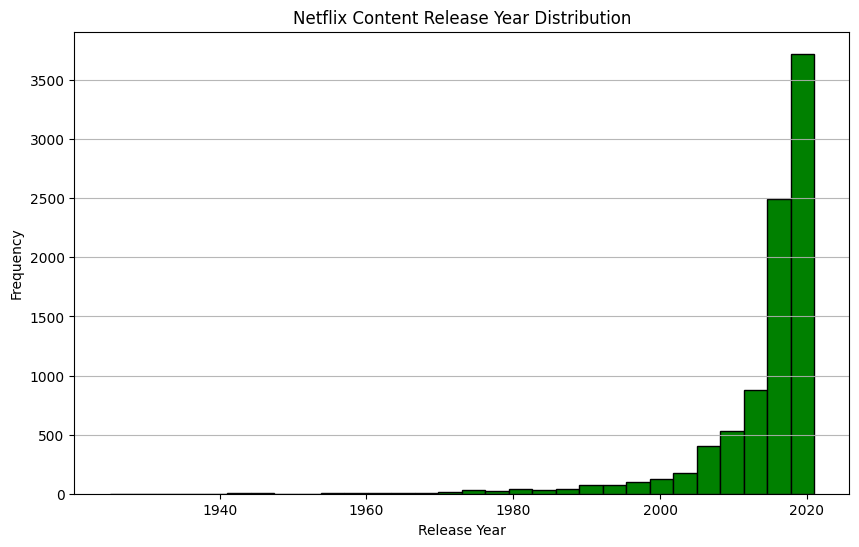

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, color='g', edgecolor='black')
plt.title('Netflix Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.9)
plt.show()


**Q10. Load the dataset and plot the distribution of populartiy of the different content categories using countplot**

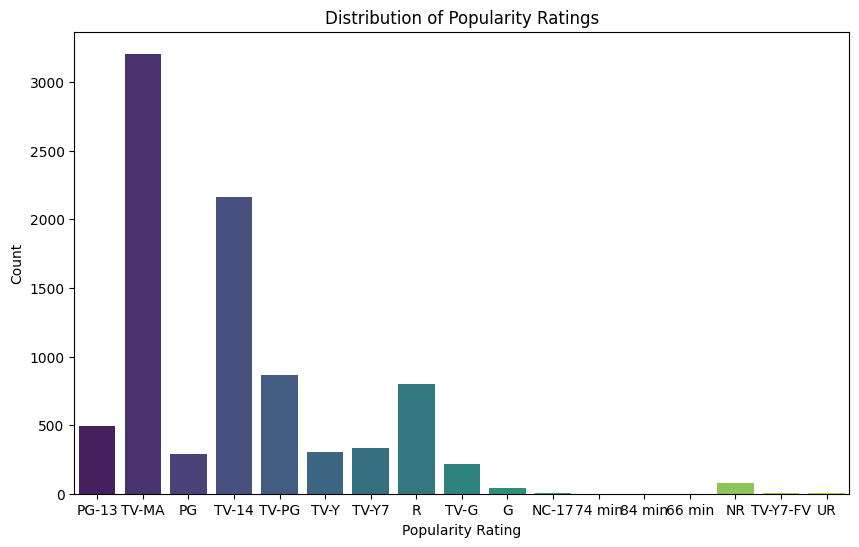

In [ ]:
# Assuming 'rating' is the column indicating popularity
popularity_column = 'rating'

# Plot countplot for popularity distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=popularity_column, data=df, hue=popularity_column, palette='viridis', legend=False)
plt.title('Distribution of Popularity Ratings')
plt.xlabel('Popularity Rating')
plt.ylabel('Count')
plt.show()


